In [1]:
from process_helper import *
import numpy as np

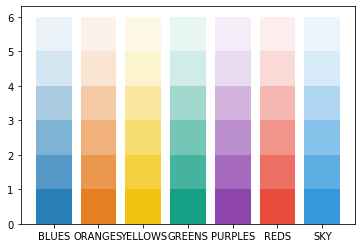

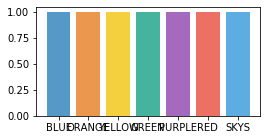

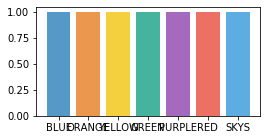

<Figure size 288x144 with 0 Axes>

In [2]:
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(4)
_, line_colors = select_color_idx(4)

In [3]:
plt.rcParams.update({'font.size': 15})
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5

In [4]:
datadir = "../output/"

## Experiment 1: limit = 16k

In [5]:
exp = "microbench_zipf_10g_fanout250"

In [6]:
data = [json.loads(line) for line in open(datadir + exp + ".txt")]
df = pd.DataFrame().from_records(data)

In [7]:
df.columns

Index(['abort_cnt_', 'accesses_', 'avg_commit_queue_sz_',
       'avg_log_flush_interval_ (us)', 'avg_log_group_sz_',
       'avg_log_latency_ (us)', 'avg_per_worker_runtime_sec',
       'avg_sum_commit_latency (us)', 'avg_sum_log_flush_latency (us)',
       'cc_time_ms', 'commit_cnt_', 'commit_latency_perc0_us',
       'commit_latency_perc50_us', 'commit_latency_perc99_us',
       'commit_queue_sz_', 'g_buf_entry_sz', 'g_buf_type', 'g_check_loaded',
       'g_commit_group_sz', 'g_commit_pool_sz', 'g_commit_queue_limit',
       'g_cpu_freq', 'g_early_lock_release', 'g_enable_group_commit',
       'g_enable_logging', 'g_force_write', 'g_idx_btree_fanout',
       'g_idx_btree_split_ratio', 'g_index_type', 'g_load_range',
       'g_load_to_remote_only', 'g_log_freq_us', 'g_node_id',
       'g_num_restore_thds', 'g_num_worker_threads', 'g_pagebuf_num_slots',
       'g_partition_sz', 'g_remote_req_retries', 'g_restore_from_remote',
       'g_save_output', 'g_total_buf_sz', 'g_warmup_finishe

In [12]:
# create pivot table
df1 = apply_mask(df, [
    ["g_buf_type", ["eq", "OBJBUF"]]
])
pivot = df1.groupby([
    "zipf_theta_", "read_perc_", "g_total_buf_sz" 
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "remote_rds_", "commit_cnt_"
    ].max()
pivot

throughput_txn_per_sec  abort_cnt_  \
zipf_theta_ read_perc_ g_total_buf_sz                                       
0.3         0.5        3000000000                     228.322        5991   
                       6000000000                     382.906        3180   
                       12000000000                    459.186           0   
                       15000000000                    414.058           0   
            0.9        3000000000                     230.278           0   
                       6000000000                     395.778        5148   
                       12000000000                   2526.240          26   
                       15000000000                   2456.810           6   
            1.0        3000000000                     226.338           0   
                       6000000000                     386.015           0   
                       12000000000                   3486.900           0   
                       15000000000                   3314.520           0   
0.5         0.5        3000000000                     289.070      240102   
                       6000000000                     397.358      153476   
                       12000000000                    455.955         134   
                       15000000000                    440.461         147   
            0.9        3000000000                     286.852       26076   
                       6000000000                     519.344       66563   
                       12000000000                   2624.300         285   
                       15000000000                   2762.940         657   
            1.0        3000000000                     283.888           0   
                       6000000000                     509.647           0   
                       12000000000                   3476.420           0   
                       15000000000                   3367.220           0   
0.7         0.5        3000000000                     391.350    16816380   
                       6000000000                     425.411     8322700   
                       12000000000                    453.424        8881   
                       15000000000                    462.760        9365   
            0.9        3000000000                     418.715     4075279   
                       6000000000                     805.150     5027198   
                       12000000000                   2637.050       15586   
                       15000000000                   2607.140       14071   
            1.0        3000000000                     419.247           0   
                       6000000000                     791.249           0   
                       12000000000                   3504.150           0   
                       15000000000                   3454.900           0   
0.9         0.5        3000000000                     288.150    67230418   
                       6000000000                     409.584    39126865   
                       12000000000                    429.489      410661   
                       15000000000                    419.515      412212   
            0.9        3000000000                     511.198    56263851   
                       6000000000                     953.604    45825098   
                       12000000000                   2467.570      443444   
                       15000000000                   2580.580      465365   
            1.0        3000000000                     895.549           0   
                       6000000000                    1752.690           0   
                       12000000000                   3529.230           0   
                       15000000000                   3574.650           0   

                                       hit_rate_  misses_  avg_log_group_sz_  \
zipf_theta_ read_perc_ g_total_buf_sz                                          
0.3         0.5        30000

In [13]:
# create pivot table
df2 = apply_mask(df, [
    ["g_buf_type", ["eq", "PGBUF"]]
])
pivot2 = df2.groupby([
    "zipf_theta_", "read_perc_", "g_total_buf_sz" 
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "g_buf_type", "remote_rds_", "commit_cnt_"
    ].max()
pivot2

throughput_txn_per_sec  abort_cnt_  \
zipf_theta_ read_perc_ g_total_buf_sz                                       
0.3         0.5        3000000000                     95.8214        1898   
                       6000000000                    139.9510        4076   
                       12000000000                   402.6230        6433   
                       15000000000                   455.2270           4   
            0.9        3000000000                     96.8712        3192   
                       6000000000                    141.9630           0   
                       12000000000                   651.9670           0   
                       15000000000                  2573.9400           2   
            1.0        3000000000                     97.2887           0   
                       6000000000                    139.5020           0   
                       12000000000                   621.4580           0   
                       15000000000                  3320.3700           0   
0.5         0.5        3000000000                    108.7730      124915   
                       6000000000                    162.8210       65908   
                       12000000000                   413.4070       71812   
                       15000000000                   444.9980         112   
            0.9        3000000000                    108.1600         681   
                       6000000000                    164.5300        9286   
                       12000000000                   604.6710       22595   
                       15000000000                  2676.9200         121   
            1.0        3000000000                    109.9820           0   
                       6000000000                    160.2780           0   
                       12000000000                   583.0790           0   
                       15000000000                  3598.1500           0   
0.7         0.5        3000000000                    137.4280     5907627   
                       6000000000                    215.6370     6279571   
                       12000000000                   401.2370     5255261   
                       15000000000                   486.2830       11576   
            0.9        3000000000                    144.3430     1290349   
                       6000000000                    222.5130     1464798   
                       12000000000                   687.2160     2987087   
                       15000000000                  2531.5100       11214   
            1.0        3000000000                    144.4770           0   
                       6000000000                    221.4570           0   
                       12000000000                   821.2150           0   
                       15000000000                  3417.9400           0   
0.9         0.5        3000000000                     88.0580    20827655   
                       6000000000                    129.2020    19194201   
                       12000000000                   317.9770    20465903   
                       15000000000                   455.2040      499504   
            0.9        3000000000                    182.8070    16348829   
                       6000000000                    263.0930    16742834   
                       12000000000                   783.4030    17208989   
                       15000000000                  2377.5100      477110   
            1.0        3000000000                    284.0440           0   
                       6000000000                    451.1650           0   
                       12000000000                  1479.0000           0   
                       15000000000                  3402.9700           0   

                                       hit_rate_  misses_  avg_log_group_sz_  \
zipf_theta_ read_perc_ g_total_buf_sz                                          
0.3         0.5        30000

In [14]:
# create pivot table
df0 = pd.DataFrame().from_records([json.loads(line) for line in open(datadir + "different_settings/" + 
                                                                     "microbench_zipf_10g_fanout18.out")])
df3 = apply_mask(df0, [
    ["g_buf_type", ["eq", "NOBUF"]]
])
pivot3 = df3.groupby([
    "zipf_theta_", "read_perc_", "g_total_buf_sz" 
])[
    "throughput_txn_per_sec","abort_cnt_","hit_rate_","misses_", 
    "avg_log_group_sz_","avg_sum_log_flush_latency (us)",
    "avg_log_latency_ (us)", "avg_log_flush_interval_ (us)", 
    "num_flushes_", "g_buf_type", "remote_rds_"
    ].max()
pivot3

throughput_txn_per_sec  abort_cnt_  \
zipf_theta_ read_perc_ g_total_buf_sz                                       
0.3         0.5        0                             107.9680           1   
            0.9        0                             137.1240           1   
            1.0        0                             136.8010           0   
0.5         0.5        0                             107.6960          19   
            0.9        0                             138.3340           4   
            1.0        0                             135.7420           0   
0.7         0.5        0                             100.3890        2035   
            0.9        0                             135.9800         474   
            1.0        0                             138.0980           0   
0.9         0.5        0                              24.8514       28466   
            0.9        0                              73.8007       18228   
            1.0        0                             139.4890           0   

                                       hit_rate_  misses_  avg_log_group_sz_  \
zipf_theta_ read_perc_ g_total_buf_sz                                          
0.3         0.5        0                     0.0   242304            2.30334   
            0.9        0                     0.0   306938            2.52205   
            1.0        0                     0.0   306544            2.45228   
0.5         0.5        0                     0.0   241722            2.32239   
            0.9        0                     0.0   309754            2.70728   
            1.0        0                     0.0   303968            2.44200   
0.7         0.5        0                     0.0   240512            2.15242   
            0.9        0                     0.0   308001            2.78571   
            1.0        0                     0.0   308800            2.48494   
0.9         0.5        0                     0.0   241918            1.07294   
            0.9        0                     0.0   308869            1.53366   
            1.0        0                     0.0   312112            2.57270   

                                       avg_sum_log_flush_latency (us)  \
zipf_theta_ read_perc_ g_total_buf_sz                                   
0.3         0.5        0                                     10292.60   
            0.9        0                                      8872.30   
            1.0        0                                      8696.00   
0.5         0.5        0                                     10358.40   
            0.9        0                                      9596.61   
            1.0        0                                      8691.01   
0.7         0.5        0                                     10205.40   
            0.9        0                                     10093.60   
            1.0        0                                      8727.30   
0.9         0.5        0                                      8807.13   
            0.9        0                                      8340.49   
            1.0        0                                      8959.00   

                                       avg_log_latency_ (us)  \
zipf_theta_ read_perc_ g_total_buf_sz                          
0.3         0.5        0                             16404.6   
            0.9        0                             14070.2   
            1.0        0                             13857.2   
0.5         0.5        0                             16451.9   
            0.9        0                             15384.3   
            1.0        0                             13734.0   
0.7         0.5        0                             16724.0   
            0.9        0                             16535.7   
            1.0        0                             13539.3   
0.9         0.5        0                             10736.5   
            0.9        0                        

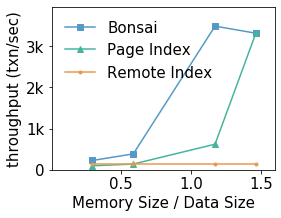

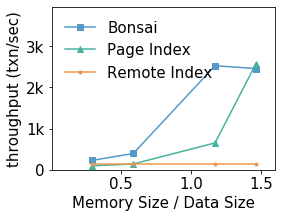

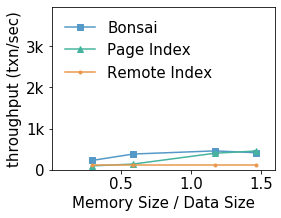

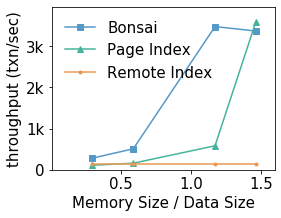

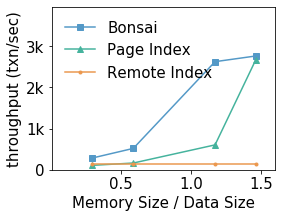

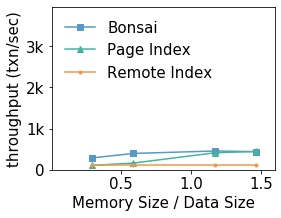

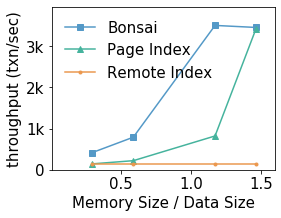

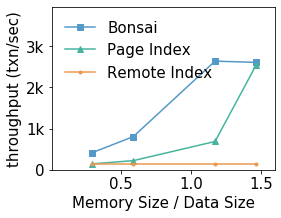

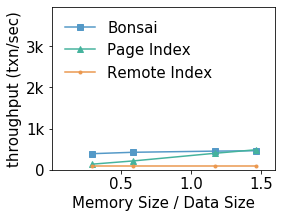

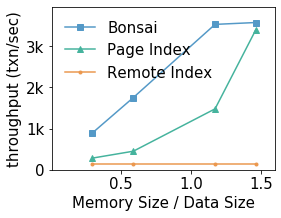

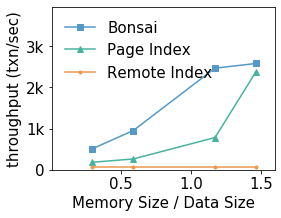

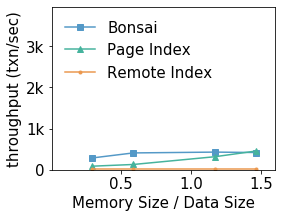

In [65]:
import matplotlib.ticker as mtick
def y_axis_formatter(x, pos):
    # Check if the value is in the thousands
    if x >= 1000:
        # Format as "1k" and divide by 1000
        return f"{int(x/1000)}k"
    else:
        return str(int(x))
ratio = [sz / 10240000000.0 for sz in pivot.index.levels[2]]
max_throughput = df["throughput_txn_per_sec"].max() * 1.1
subplot_names = ["Read-only", "Read-intensive", "Write-intensive"]
plot_names = ["Zipfian Theta = %.1f" % z for z in pivot.index.levels[0]]
path = "/Users/scarlet/Desktop/Bonsai/figures/"
for i, zipf in enumerate(pivot.index.levels[0]):
    plot_data = pivot.loc[zipf]
    plot_data2 = pivot2.loc[zipf]
    plot_data3 = pivot3.loc[zipf]
    for j, read in enumerate(df["read_perc_"].unique()):
        fig, ax = plt.subplots()
        ax.plot(ratio, 
                plot_data.loc[read]["throughput_txn_per_sec"],
                color=line_colors["BLUE"],
                marker="s", label="Bonsai")
        ax.plot(ratio, 
                plot_data2.loc[read]["throughput_txn_per_sec"],
                color=line_colors["GREEN"],
                marker="^", label="Page Index")
        ax.plot(ratio, 
                [plot_data3.loc[read]["throughput_txn_per_sec"]] * len(ratio),
                color=line_colors["ORANGE"],
                marker=".", label="Remote Index")
        ax.set_ylim(0, max_throughput)
        ax.set_xlim(0, 1.6)
        ax.set_xticks([0.5, 1.0, 1.5])
        ax.legend(loc="upper left", frameon=False)
        ax.set_ylabel("throughput (txn/sec)")
        ax.set_xlabel("Memory Size / Data Size")
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(y_axis_formatter))
        fig.set_size_inches(4, 3)
        #fig.savefig(path + "point_10g_fanout250_limit16k_r%.f_zf%.f.pdf" % (read * 100, zipf*10), bbox_inches="tight")    

In [ ]:
(pivot2["remote_rds_"] / pivot2["commit_cnt_"]) / (pivot["remote_rds_"] / pivot["commit_cnt_"])